# Assignment 5: Deep Learning Modeling

## Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from Assignment5_Intent import Intents
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras import regularizers
from tensorflow.keras.optimizers import SGD, Adam


## Load data

In [2]:
with open('train_test_data.pickle', 'rb') as f:
    data = pickle.load(f)
    
X_train = data['X_train']
X_test = data['X_test']
Y_train = data['Y_train']
Y_test = data['Y_test']

## Define Model

In [3]:
model = Sequential()

model.add(Dense(128, input_shape=(len(X_train[0]),), activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(64, activation='relu'))

model.add(Dropout(0.1))

model.add(Dense(len(Y_train[0]), activation='softmax'))

In [4]:
# Check model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               5760      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 2)                 130       
                                                                 
Total params: 14,146
Trainable params: 14,146
Non-trainable params: 0
_________________________________________________________________
None


## Compile Model

In [5]:
adam = Adam(learning_rate=0.01, weight_decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

## Train Model

In [11]:
history = model.fit(X_train, Y_train, epochs=100, batch_size=5, verbose=1, validation_split=0.1)

Epoch 1/100
430/430 [==============================] - 0s 587us/step - loss: 0.3025 - accuracy: 0.8678 - val_loss: 0.2485 - val_accuracy: 0.9038
Epoch 2/100
430/430 [==============================] - 0s 446us/step - loss: 0.2952 - accuracy: 0.8715 - val_loss: 0.2600 - val_accuracy: 0.8954
Epoch 3/100
430/430 [==============================] - 0s 440us/step - loss: 0.2932 - accuracy: 0.8659 - val_loss: 0.2691 - val_accuracy: 0.8912
Epoch 4/100
430/430 [==============================] - 0s 434us/step - loss: 0.3030 - accuracy: 0.8710 - val_loss: 0.2629 - val_accuracy: 0.8954
Epoch 5/100
430/430 [==============================] - 0s 459us/step - loss: 0.2904 - accuracy: 0.8757 - val_loss: 0.2726 - val_accuracy: 0.8996
Epoch 6/100
430/430 [==============================] - 0s 436us/step - loss: 0.2845 - accuracy: 0.8752 - val_loss: 0.2967 - val_accuracy: 0.8912
Epoch 7/100
430/430 [==============================] - 0s 440us/step - loss: 0.2930 - accuracy: 0.8734 - val_loss: 0.2795 - val_ac

430/430 [==============================] - 0s 434us/step - loss: 0.2966 - accuracy: 0.8687 - val_loss: 0.4162 - val_accuracy: 0.8912
Epoch 58/100
430/430 [==============================] - 0s 433us/step - loss: 0.2942 - accuracy: 0.8724 - val_loss: 0.6854 - val_accuracy: 0.8536
Epoch 59/100
430/430 [==============================] - 0s 432us/step - loss: 0.2942 - accuracy: 0.8734 - val_loss: 0.7139 - val_accuracy: 0.8787
Epoch 60/100
430/430 [==============================] - 0s 432us/step - loss: 0.3054 - accuracy: 0.8757 - val_loss: 0.7058 - val_accuracy: 0.8577
Epoch 61/100
430/430 [==============================] - 0s 439us/step - loss: 0.3016 - accuracy: 0.8641 - val_loss: 0.6012 - val_accuracy: 0.8870
Epoch 62/100
430/430 [==============================] - 0s 432us/step - loss: 0.2927 - accuracy: 0.8715 - val_loss: 0.4628 - val_accuracy: 0.8661
Epoch 63/100
430/430 [==============================] - 0s 433us/step - loss: 0.2886 - accuracy: 0.8696 - val_loss: 0.4389 - val_accuracy

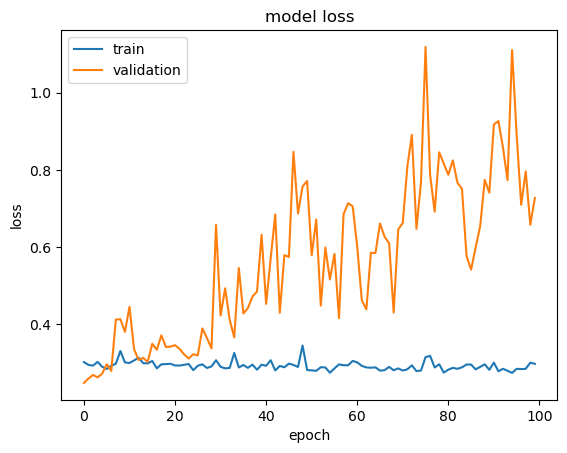

In [12]:
# Visualize the training process
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

## Test Model

In [13]:
# Predict model
Y_pred_encodings = model.predict(X_test, verbose="auto")
# Convert the result from probability-based to one hot encoding-based
Y_pred = np.zeros(Y_pred_encodings.shape)
for row, encoding in enumerate(Y_pred_encodings):
    # Identify the index of maximum number in each row
    max_val_index = (list(encoding)).index(max(list(encoding)))
    # Set max number as 1 while keep other as 0
    Y_pred[row][max_val_index] = 1

19/19 [==============================] - 0s 530us/step


## Evaluate Model

In [14]:
# Initialize the row count
correct_row_cnt = 0
for row_pred, row_test in zip(Y_pred, Y_test):
    # Initialize the character count
    correct_char_cnt = 0
    for ele_pred, ele_test in zip(row_pred, row_test):
        # If all character in each row matched, then it's considered a correct row match
        if ele_pred == ele_test:
            correct_char_cnt += 1
    if correct_char_cnt == Y_pred.shape[1]:
        correct_row_cnt += 1
        
# Accuracy equals as proportion of correct row to all row
accuracy = correct_row_cnt/Y_pred.shape[0]
print(f"Accuracy: {accuracy}")

Accuracy: 0.8324958123953099


## Save Model

In [15]:
model.save('chatbot_model.h5')